In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-dataset/incidence_per_1000_pop_at_risk.csv
/kaggle/input/malaria-dataset/reported_numbers.csv
/kaggle/input/malaria-dataset/estimated_numbers.csv


In [13]:
!pip install imblearn

ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


In [14]:
!pip install plotly

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import missingno as  msno

from scipy import stats
from sklearn.decomposition import PCA
from sklearn import preprocessing as prepro
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [16]:
#df = pd.read_csv('dataset/malaria/reported_numbers.csv')
#estimated = pd.read_csv('dataset/malaria/estimated_numbers.csv')
#incidence = pd.read_csv('dataset/malaria/incidence_per_1000_pop_at_risk.csv')

reported = pd.read_csv('/kaggle/input/malaria-dataset/reported_numbers.csv')
#test = incidence[:107]

In [17]:
df = pd.DataFrame(reported)
df.head(15)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
5,Azerbaijan,2017,0.0,NaN,Europe
6,Bangladesh,2017,4893.0,13.0,South-East Asia
7,Belize,2017,7.0,0.0,Americas
8,Benin,2017,1573163.0,2182.0,Africa
9,Bhutan,2017,24.0,1.0,South-East Asia


In [18]:
#lihat total negara
len(df.Country.unique())

108

In [19]:
df.Year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
1939    2000
1940    2000
1941    2000
1942    2000
1943    2000
Name: Year, Length: 1944, dtype: int64

In [20]:
#lihat total negara berdasarkan
df.Year.value_counts()

2017    108
2016    108
2001    108
2002    108
2003    108
2004    108
2005    108
2006    108
2007    108
2008    108
2009    108
2010    108
2011    108
2012    108
2013    108
2014    108
2015    108
2000    108
Name: Year, dtype: int64

In [21]:
#cek seluruh data dalam tabel
df.shape

(1944, 5)

In [22]:
#cek apakah ada data yang kosong?
df.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

In [23]:
df.dropna(inplace=True)
df.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [24]:
#data dari 1944 menjadi 1554
df.shape

(1554, 5)

In [25]:
df_group =df.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()
df_group.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,No. of cases,No. of deaths
0,Afghanistan,1045271.0,363.0
1,Algeria,1044.0,4.0
2,Angola,26006152.0,125364.0
3,Argentina,2098.0,2.0
4,Armenia,355.0,0.0


In [26]:
df_cases = df_group[["Country","No. of cases"]]
df_cases.head()

,Country,No. of cases
0,Afghanistan,1045271.0
1,Algeria,1044.0
2,Angola,26006152.0
3,Argentina,2098.0
4,Armenia,355.0


In [27]:
pio.templates.default ='plotly_dark'
fig = px.bar(df_cases.sort_values("No. of cases",ascending=False)[:20][::-1],x="No. of cases",y ="Country",text="No. of cases",
             title="20 Negara dengan Jumlah Kasus Malaria tertinggi dari tahun 2000 hingga 2017",
             color_discrete_sequence= px.colors.qualitative.Light24,height=900,orientation="h")#
fig.show()

In [28]:
df_cases = df_cases.sort_values("No. of cases", ascending = False)

In [29]:
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches:
        axis.annotate ("{0:.1f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

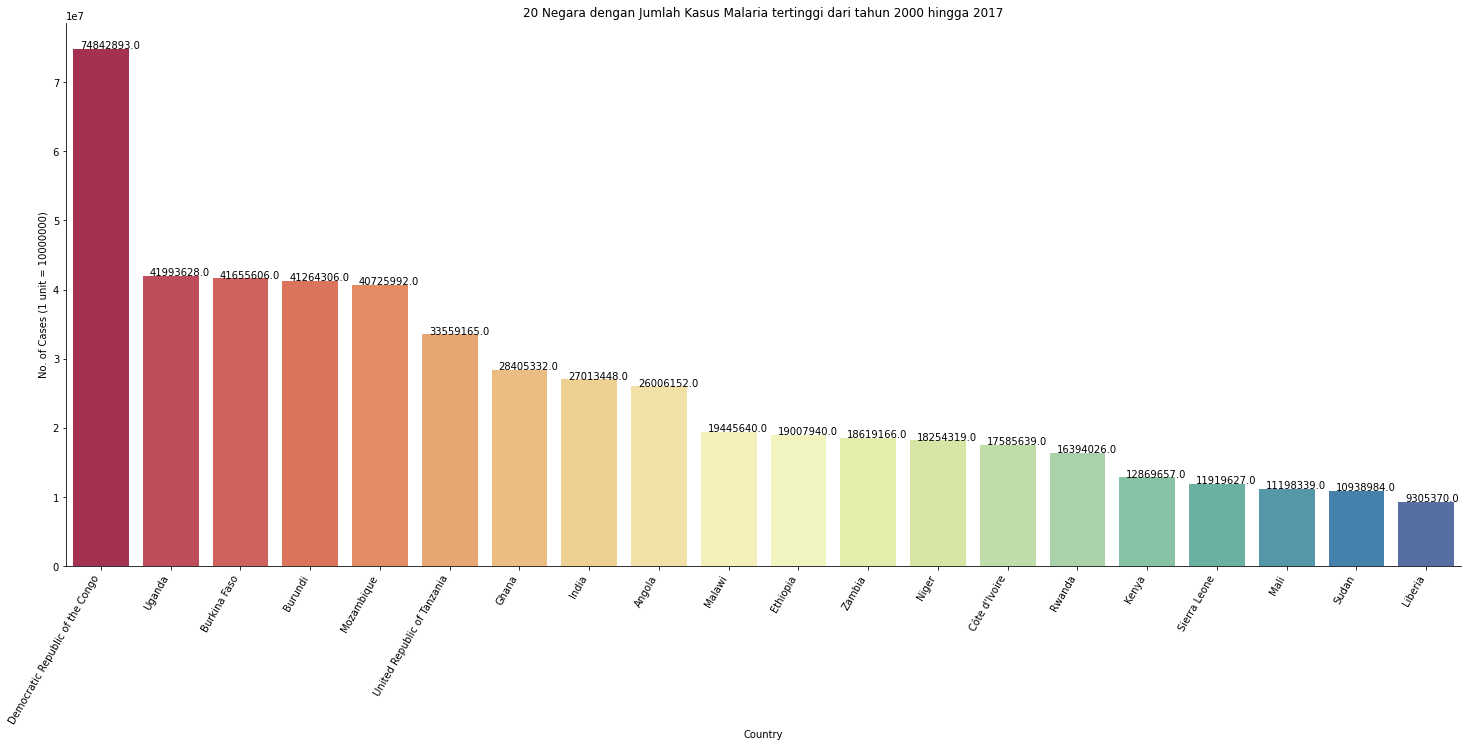

In [30]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of cases", data=df_cases[:20] ,palette = "Spectral")
plt.title ("20 Negara dengan Jumlah Kasus Malaria tertinggi dari tahun 2000 hingga 2017")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [31]:
df_group = df_group[["Country","No. of deaths"]]
df_group.head()

,Country,No. of deaths
0,Afghanistan,363.0
1,Algeria,4.0
2,Angola,125364.0
3,Argentina,2.0
4,Armenia,0.0


In [32]:
df_group = df_group.sort_values("No. of deaths", ascending = False)

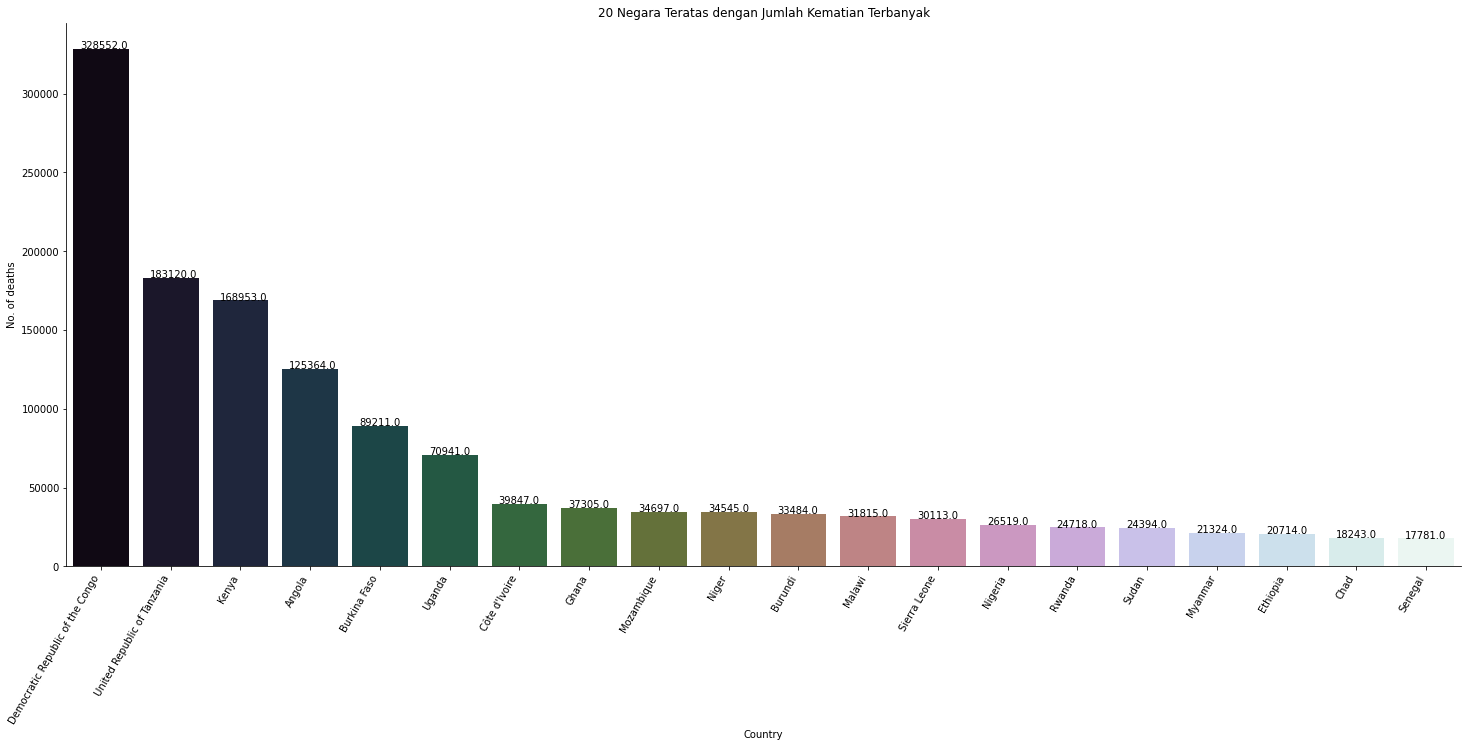

In [33]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of deaths", data=df_group[:20] ,palette = "cubehelix")
plt.title ("20 Negara Teratas dengan Jumlah Kematian Terbanyak")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of deaths")
data_graph(ax,0.1,10)
plt.show()

In [34]:
df_group = df.groupby("WHO Region")["No. of cases","No. of deaths"].sum().reset_index()
df_group.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,WHO Region,No. of cases,No. of deaths
0,Africa,545111852.0,1480850.0
1,Americas,13433321.0,11039.0
2,Eastern Mediterranean,15841260.0,26764.0
3,Europe,112675.0,25.0
4,South-East Asia,38305249.0,49802.0


In [35]:
df_Region_case = df_group[["WHO Region","No. of cases"]]
df_Region_case.head()

,WHO Region,No. of cases
0,Africa,545111852.0
1,Americas,13433321.0
2,Eastern Mediterranean,15841260.0
3,Europe,112675.0
4,South-East Asia,38305249.0


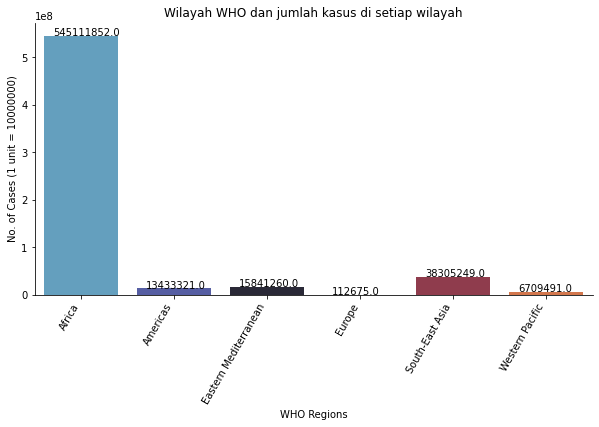

In [36]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of cases", data=df_Region_case ,palette = "icefire")
plt.title ("Wilayah WHO dan jumlah kasus di setiap wilayah")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [37]:
df_Region_deaths = df_group[["WHO Region","No. of deaths"]]
df_Region_deaths.head()

,WHO Region,No. of deaths
0,Africa,1480850.0
1,Americas,11039.0
2,Eastern Mediterranean,26764.0
3,Europe,25.0
4,South-East Asia,49802.0


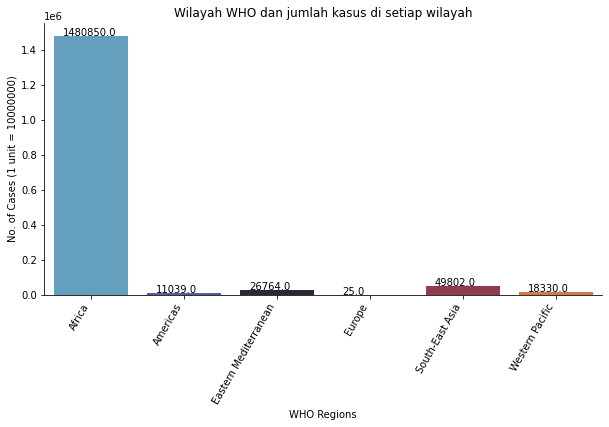

In [38]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of deaths", data=df_Region_deaths ,palette = "icefire")
plt.title ("Wilayah WHO dan jumlah kasus di setiap wilayah")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [39]:
year = df.groupby("Year")["No. of cases","No. of deaths"].sum().reset_index()
year.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,No. of cases,No. of deaths
0,2000,5279182.0,21419.0
1,2001,5534764.0,26162.0
2,2002,5335247.0,70683.0
3,2003,8243454.0,91247.0
4,2004,9389638.0,87926.0


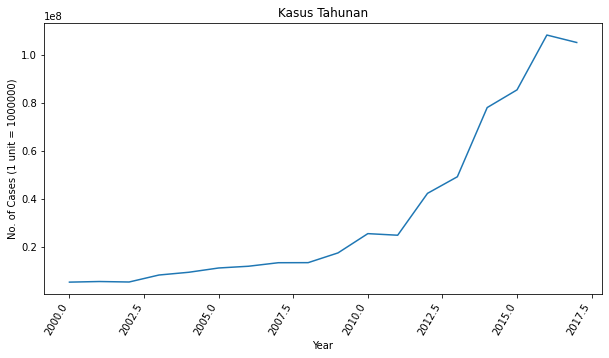

In [40]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of cases",data=year)
plt.title ("Kasus Tahunan")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of Cases (1 unit = 1000000)")
plt.show()

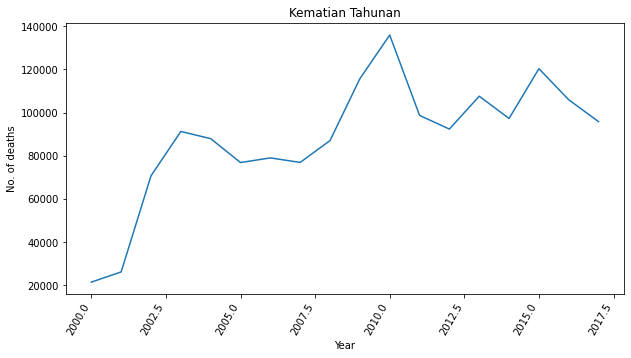

In [41]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of deaths",data=year)
plt.title ("Kematian Tahunan")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of deaths")
plt.show()

In [42]:
pred_df1 = df['Country'].str.get_dummies()
pred_df2 = df['WHO Region'].str.get_dummies()

In [43]:
frames = [df,pred_df1,pred_df2]
pred_df = pd.concat(frames,axis=1)
pred_df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region,Afghanistan,Algeria,Angola,Argentina,Armenia,...,Viet Nam,Yemen,Zambia,Zimbabwe,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Algeria,2017,0.0,0.0,Africa,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Angola,2017,3874892.0,13967.0,Africa,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Argentina,2017,0.0,1.0,Americas,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Bangladesh,2017,4893.0,13.0,South-East Asia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
!pip install pydot

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [46]:
dummie_country = df['Country'].str.get_dummies()
dummie_region = df['WHO Region'].str.get_dummies()

In [47]:
frames = [df,dummie_country,dummie_region]
data = pd.concat(frames,axis=1)
data.head()

,Country,Year,No. of cases,No. of deaths,WHO Region,Afghanistan,Algeria,Angola,Argentina,Armenia,...,Viet Nam,Yemen,Zambia,Zimbabwe,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Algeria,2017,0.0,0.0,Africa,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Angola,2017,3874892.0,13967.0,Africa,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Argentina,2017,0.0,1.0,Americas,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Bangladesh,2017,4893.0,13.0,South-East Asia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
colums = ["Country","WHO Region"]
data.drop(columns = colums, inplace=True)

In [49]:
data

,Year,No. of cases,No. of deaths,Afghanistan,Algeria,Angola,Argentina,Armenia,Azerbaijan,Bangladesh,...,Viet Nam,Yemen,Zambia,Zimbabwe,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,2017,161778.0,10.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2017,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2017,3874892.0,13967.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2017,0.0,1.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,2017,4893.0,13.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2000,17734.0,379.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1937,2000,126.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1938,2000,6768.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1939,2000,29736.0,24.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
data.shape

(1554, 114)

In [51]:
x = data.drop("No. of deaths",axis=1)
y = data[["No. of deaths"]]

In [52]:
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1087, 113)
x_test : (467, 113)
y_train : (1087, 1)
y_test : (467, 1)


In [54]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=20, random_state=0)

In [55]:
y_pred = regressor.predict(x_test)

In [56]:
#Mean Absolute Error
#Mean Squared Error
#Root Mean Squared Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0948895879224831
MSE: 0.09786645534418238
RMSE: 0.3128361477581873


In [57]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [58]:
predictions = lin_reg.predict(x_test)

In [59]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.17517806376342332
MSE: 0.41436583696829354
RMSE: 0.6437125421865676


In [60]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel = 'rbf')
SVM_regressor.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [61]:
predictions = SVM_regressor.predict(x_test)
#y_pred = sc_y.inverse_transform(y_pred)

In [62]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.18292983902852436
MSE: 0.5279790602392371
RMSE: 0.7266216761418813
